# 集体操作 
### 问题：
● 点对点和集体交流的区别是什么？
### 目标：
● 了解集体交流的基础知识。

● 了解不同类型的集体交流。

● 看看集体交流在实践中是如何被使用的。

当进程组需要交换消息时，并行编程有很多情况。没有显式地发送和接收消息，MPI的真正威力来自于被称为集体的团体操作。

集体通信允许在一个组的多个进程之间同时发送数据。集体功能是在阻塞和非阻塞版本中出现的。

更常用的集体通信操作如下：

● 同步

○ 进程等待，直到组的所有成员都达到同步点

● 全球通信功能

○ 将一个成员的广播数据发送给一个组的所有成员

○ 将所有成员的数据收集到一个组中的一个成员

○ 将数据从一个成员传播到一个组的所有成员

● 集体计算(减少）

○ 一个组的一个成员从其他成员收集数据，并对该数据执行最小、最大、相加、相乘等操作。

● 集体输入/输出

○ 一个组中的每个成员都读或写一个文件的一部分。

# 集体交流和融合点
关于集体通信的一件事是，它意味着进程之间的同步点。这意味着所有进程必须在它们的代码中达到一个点，然后才能再次开始执行。

集体通信例程必须包含在通信器范围内的所有进程。如果在通信者中有一个任务不参与，就会发生意想不到的行为，包括程序故障。程序员的责任是确保通信者中的所有进程都参与到任何集体操作中。

事实证明，MPI有一个专门用于同步进程的特殊函数：Comm.Barrier（）。

函数的名称是描述性的——函数形成一个屏障，而在通信器中没有进程可以通过这个屏障，直到所有的进程调用该函数为止。这里有一个例子。假设水平轴表示程序的执行，圆圈代表不同的进程：

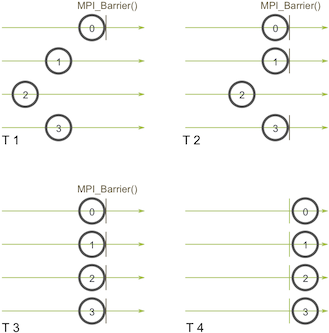

进程0在第一次快照（T1）时首先调用Barrier。当进程0挂在栅栏上时，进程1和3最终会使它（T2）。当进程2最终到达barrier（T3）时，所有进程都将再次开始执行（T4）。

# 广播
广播是标准的集体通信技术之一。在广播中，一个进程将相同的数据发送给通信者中的所有进程。广播的主要用途之一是向一个并行程序发送用户输入，或者向所有进程发送配置参数。

广播的传播模式是这样的：

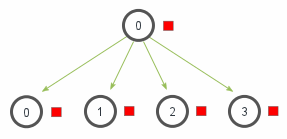

在这个例子中，进程0是根进程，它有初始的数据副本。所有其他进程都接收数据的副本。

尽管根进程和接收方进程做不同的工作，但是它们都调用相同的通信Comm.Bcast函数。当根进程（在我们的例子中，它是进程0）调用Comm.Bcast时，数据变量将被发送到所有其他进程。当所有接收方进程调用Comm.Bcast时，数据变量将被来自根进程的数据填充。

# 分散
分散是一种与广播非常相似的集体行动。分散涉及到一个指定的根进程，将数据发送到通信器中的所有进程。广播和分射的主要区别很小，但很重要。广播向所有进程发送相同的数据，而分散将数组的大块发送给不同的进程。请参阅下面的插图以作进一步说明。

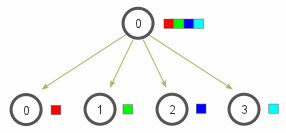

在前面的例子中，广播在根进程（红框）中接受一个单一的数据元素，并将其复制到所有其他进程。然而，分散是由一系列元素组成的，并以进程秩的顺序分布元素。第一个元素（红色）用于处理0，第二个元素（绿色的）用于处理1，以此类推。尽管根进程（进程零0）包含整个数据数组，但是分散操作将把适当的元素复制到进程的接收缓冲区中。

Comm.Scatter方法有三个参数。第一个参数是驻留在根进程上的数据数组。第二个参数用于存放接收到的数据。最后一个参数指明了分散数据数组的根进程。

# 聚集
聚集与分散相反。聚集操作不是将元素从一个进程传播到许多进程，而是从许多进程中提取元素，并将它们收集到一个单一的进程中。这个程序对于许多并行算法非常有用，比如并行排序和搜索。下面是这个算法的一个简单说明。

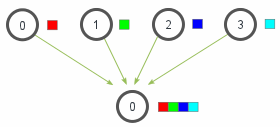

与分散类似，聚集从每个进程中提取元素并将它们收集到根进程。这些元素是由接收它们的进程的等级排序的。

Comm.Gather方法采用相同的参数作为Comm.Gather。但是，在收集操作中，只有根进程需要有一个有效的接收缓冲区。

# 减少
减少是函数式编程的一个经典概念。数据减少包括通过一个函数将一组数字减少到一组更小的数字。例如，假设我们有一个数字[1,2,3,4,5]。用sum函数来减少这个数字列表会产生sum（[1，2，3，4，5]）=15。类似地，乘法减少会产生multiply（[1，2，3，4，5]）=120。

正如您所想象的那样，在一组分布式数字中应用减少函数可能会非常麻烦。与此同时，很难有效地规划非交换性的减少，也就是说，必须在一定的顺序下进行减少。幸运的是，有一个名为Comm.Reduce的方便函数，它将处理程序员在并行应用程序中需要做的几乎所有常见的减少。

Comm.Reduce方法接受一系列的输入元素，并将输出元素的数组返回到根进程。输出元素包含减少的结果。MPI包含一组可以使用的通用减少操作，尽管也可以定义定制的减少操作。

下图显示了减少的通信模式：

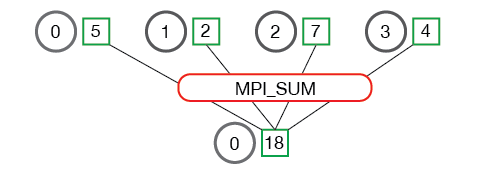

在上面，每个进程都包含一个整数。减少操作的根进程为0，并使用MPI_SUM作为减少操作。把四个数字相加作为结果，并存储在根进程上。

当进程包含多个元素时，看看会发生什么也很有用。下图显示了每个进程的多个数字的减少。

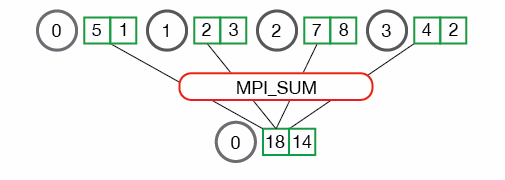

上面的说明各有两个元素。结果的总和发生在每个元素的基础上。换句话说，不是把所有数组中的所有元素都加到一个元素中，而是将每个数组中的第i个元素都相加到进程0的结果数组中的第i个元素上。

# 集体操作例子
### Comm.Barrier( )
同步操作。在一个组中创建一个屏障同步。当到达Barrier（）调用时，每个任务都要阻塞，直到组中的所有任务都到达Barrier（）调用。然后所有的任务都可以自由进行。

### Comm.Bcast(buf, root=0)
数据移动操作。广播（发送）来自进程的消息，并将“根”级别的“根”发送给组中的所有其他进程。

### Comm.Scatter(sendbuf, recvbuf, root=0)
数据移动操作。将不同的消息从单个源任务分配给组中的每一个任务。

### Comm.Gather(sendbuf, recvbuf, root=0)
数据移动操作。从组中的每个任务收集不同的消息到单个目的地任务。这个进程是Scatter( )的相反操作。

### Comm.Alltoall(sendbuf, recvbuf)
所有的分散/聚集，将数据从所有的进程发送到一个组中的所有进程。

### Comm.Reduce(sendbuf, recvbuf, op=MPI.SUM, root=0)
通过应用操作op，将所有进程的值降低到单个值。操作包括：

● MPI.MAX—返回最大元素。

● MPI.MIN—返回最小元素。

● MPI.SUM—元素的和。

● MPI.PROD—元素的乘。

● MPI.LAND—执行逻辑并跨元素。

● MPI.LOR—执行逻辑或跨元素。

● MPI.BAND—在元素的位上执行一个位次。

● MPI.BOR—执行位次或跨越元素的位。

● MPI.MAXLOC—返回拥有它的进程的最大值和等级。

● MPI.MINLOC—返回拥有它的进程的最小值和等级。

### File.Open(comm, filename, amode, info)
在通信组中打开所有进程的文件。

### File.Write_all(buffer)
集体写操作。

# 并行集体版本的中点规则
下面的例子展示了如何使用集体操作来计算中点规则。

我们选择将每个分区n的增量数广播到每个进程，尽管这不是严格必需的。一旦进程接收到n，他们就能够计算出它们的分区。然后，进程将这些值返回到根进程，使用Reduce自动计算所有值的总和，并将结果放在integral_sum中。

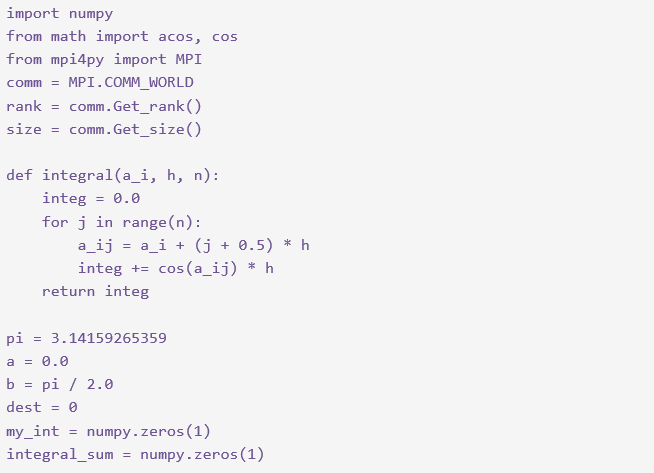

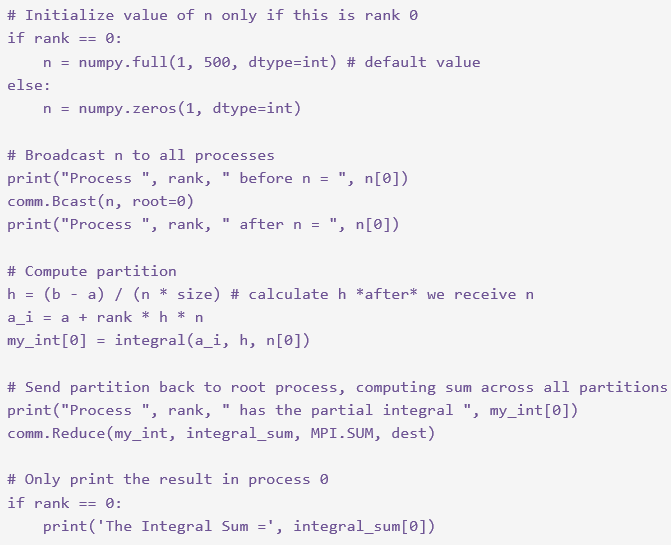

用以下命令运行这个程序：mpiexec -n 4 python midpoint_coll.py

下面是生成的输出示例：
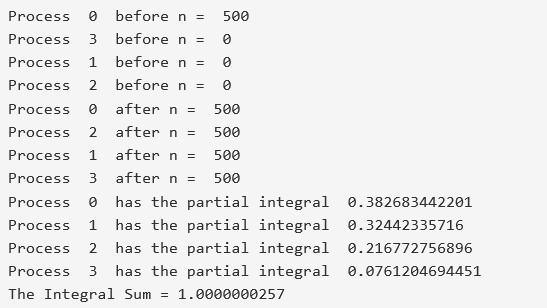

# 挑战
修改上面的代码，以同时广播每个进程的增量n和增量宽度h的数量。提示：h将需要是一个NumPy数组。

# ！关键点
● 集体通信允许从多个进程同时发送或接收数据。

● 集体操作属于广泛的类别：同步、通信、计算和输入/输出。